In [1]:
%matplotlib inline
import matplotlib
matplotlib.rc('image', interpolation='nearest', origin='lower', cmap='viridis')
import matplotlib.pyplot as plt
import numpy as np
import webbpsf
webbpsf.setup_logging()
from webbpsf import wfirst

WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.


# JWST NIRCam

[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] Computing wavelength weights using synthetic photometry for F210M...
[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 10
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+NIRCam
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/jlong/software/webbpsf-data/pupil_RevV.fits
[  poppy] JWST Entrance Pupil: Loaded OPD from /Users/jlong/software/webbpsf-data/NIRCam/OPD/OPD_RevV_nircam_155.fits
[  poppy] The supplied pupil OPD is a datacube but no slice was specified. Defaulting to use slice 0.
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added detector with pixelscale=0.0311 and oversampling=4: NIRCam detector
[  poppy] Calculating PSF with 10 wavelengths
[  poppy] User requested saving intermediate wavefronts in call to poppy.calc_psf
[  

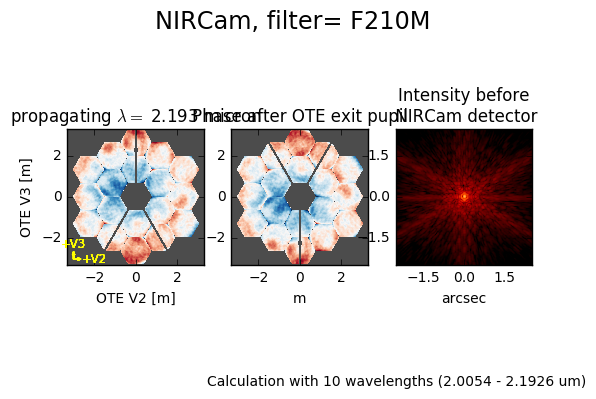

In [2]:
nc = webbpsf.NIRCam()
nc.filter = 'F210M'
psf, interm = nc.calc_psf(display=True, return_intermediates=True)

# WFIRST WFI

[  poppy] No source spectrum supplied, therefore defaulting to 5700 K blackbody
[  poppy] Computing wavelength weights using synthetic photometry for Z087...
[webbpsf] Using the unmasked WFI pupil shape based on wavelengths requested
[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 10
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: WFIRST+WFI
[  poppy] WFIRST Entrance Pupil: Loaded amplitude transmission from /Users/jlong/software/webbpsf-data/wfc_pupil_rev_mcr.fits
[  poppy] WFIRST Entrance Pupil: Loaded OPD from /Users/jlong/software/webbpsf-data/upscaled_HST_OPD.fits
[  poppy] Added pupil plane: WFIRST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added pupil plane: Field Dependent Aberration (SCA01)
[  poppy] Added detector with pixelscale=0.11 and oversampling=4: WFI detector
[  poppy] Calculating PSF with 10 wavelengths
[  poppy] User requested saving intermediate wavefronts

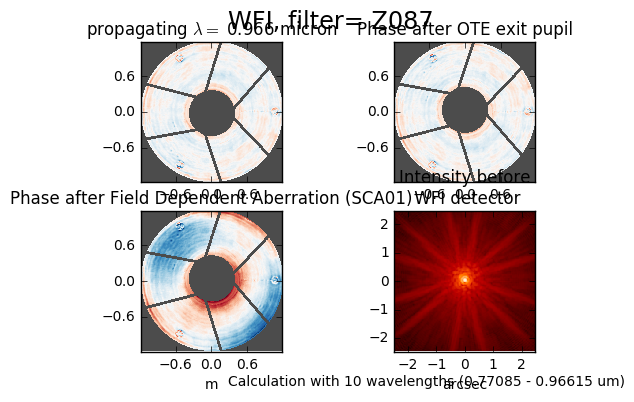

In [3]:
wfi = wfirst.WFI()
wfi.filter = 'Z087'
wpsf, winterm = wfi.calc_psf(display=True, return_intermediates=True)

# Make the figure

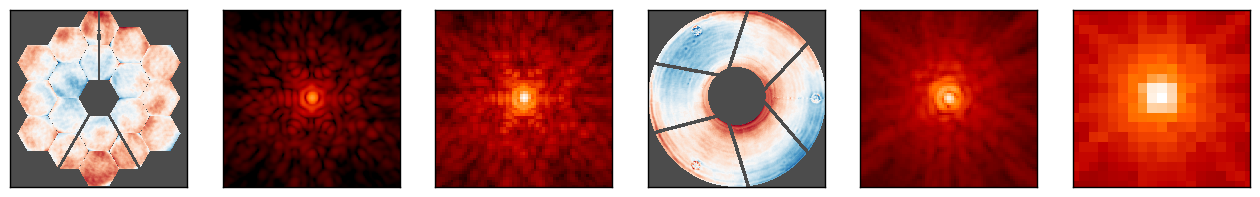

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(16, 4))

crop_arcsec = 2.0

# JWST NIRCam
phasemap = interm[0].phase.copy()
phasemap[interm[0].intensity == 0.0] = np.nan
axes[0].imshow(phasemap, cmap='RdBu_r')
webbpsf.display_psf(psf, ext='OVERSAMP', colorbar=False, ax=axes[1], imagecrop=crop_arcsec)
webbpsf.display_psf(psf, ext='DET_SAMP', colorbar=False, ax=axes[2], imagecrop=crop_arcsec)

# WFIRST WFI
wphasemap = winterm[2].phase.copy()
wphasemap[winterm[2].intensity == 0.0] = np.nan
axes[3].imshow(wphasemap, cmap='RdBu_r')
webbpsf.display_psf(wpsf, ext='OVERSAMP', colorbar=False, ax=axes[4], imagecrop=crop_arcsec)
webbpsf.display_psf(wpsf, ext='DET_SAMP', colorbar=False, ax=axes[5], imagecrop=crop_arcsec)


for ax in axes:
    ax.set_title('')
    ax.set_ylabel('')
    ax.set_xlabel('')
    ax.set_xticks([])
    ax.set_yticks([])

plt.savefig('./readme_fig.png', bbox_inches='tight')